### Môn: Khai thác dữ liệu nâng cao
giảng viên: T.S Nguyễn Ngọc Thảo
Sinh viên: Trương Ngọc Tài
Mssv: 1512473

Dòng sản phẩm: dây đeo thay thế dùng cho 'Apple watch kích thước 38mm/42mm': 
<img src="apple_42_38.jpg" width = "150" height = "150">



Danh sách các sản phẩm:
- [Asin: B07CL119KV] iGK Sport Band Compatible for Apple Watch 42mm 38mm, Soft Silicone Sport Strap Replacement Bands Compatible for iWatch Apple Watch Series 3, Series 2, Series 1 S/M M/L <img src=".\productPicture\iGK.png" width = "150" height = "150">
- [Asin: B077VLBBYT] Yunsea Compatible for Apple Watch Band 38mm 42mm, Soft Nylon Sport Loop, with Hook and Loop Fastener, Replacement Band Compatible for iWatch Series 1/2/3 <img src=".\productPicture\yunsea.png" width = "150" height = "150">
- [Asin: B0786QKGX3] VATI Replacement Band Compatible for Apple Watch Band 38mm 42mm Soft Breathable Nylon Sport Loop Band Adjustable Wrist Strap Replacement Band Compatible for iWatch Series 3/2/1,Sport,Nike+,Edition <img src=".\productPicture\vati.png" width = "150" height = "150">
- [Asin: B07BQWGVDX] OULEDI Compatible Stainless Steel Band for Apple Watch Replacement Mesh Strap Bracelet for iWatch Series 1 Series 2 Series 3 Series 4 with Magnetic Closure Clasp 38mm 40mm Rose Gold <img src=".\productPicture\ouledi.png" width = "150" height = "150">
- [Asin: B07GTG8FM3] iYou Sport Band Compatible for Apple Watch Band 38MM 42MM, Soft Silicone Replacement Sport Strap Compatible for iWatch 2017 Apple Watch Series 3/2/1, Edition, Nike+, All Models More Colors Choose <img src=".\productPicture\iyou.png" width = "150" height = "150">
- [Asin: B075R4NNPH] Waterproof Apple Watch Case 38mm Series 3 & 2 with Premium Soft Silicone Apple Watch Band by Catalyst, Shock Proof Impact Resistant (not Compatible with The 42mm iWatch) <img src=".\productPicture\Waterproof.png" width = "150" height = "150">
- [Asin: B079NJY3QL] Catalyst Apple Watch Case 38mm Series 3 & Series 2 Drop Proof Shock Proof Impact Protection Apple Watch case [Rugged iWatch Protective case], Army Green <img src=".\productPicture\Catalyst.png" width = "150" height = "150">
- [Asin: B077NCMCR6] For Apple Watch Band 38mm, Maxjoy Nylon iWatch Strap Replacement Bands with Stainless Metal Clasp for Apple Watch Series 3 Series 2 Series 1 Sport and Edition, Army Green <img src=".\productPicture\Maxjoy.png" width = "150" height = "150">
- [Asin: B071FK7GS6] Compatible Apple Watch Band 38mm Case, Camyse Shockproof Rugged Protective Cover with Bands Stainless Steel Clasp for iWatch Apple Watch Series 3, 2, 1 Sport Edition for Men Women grils boys - Black <img src=".\productPicture\Camyse.png" width = "150" height = "150">

# Quy trình

### 1/ Thu thập dữ liệu và phân chia dữ liệu
### 2/ Xử lí dữ liệu
### 3/ Xây dựng model
### 4/ Huấn luyện model
### 5/ Đánh giá model


In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# các thư viện sử dụng
#from lxml import html  
import json
import requests
import re
import inflect

#vẽ dữ liệu
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from dateutil import parser as dateparser
from time import sleep
from bs4 import BeautifulSoup

#remove stop word
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 


# stemming
# PorterStemmer để steming
# WordNetLematizer để chuyển đổi từ loại
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
#from nltk.stem.snowball import SnowballStemmer

# tranform vector su dugn tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.cross_validation import train_test_split
# model training
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.cross_validation import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, f1_score, confusion_matrix, roc_auc_score

# download data of nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('sentiwordnet')
## n - NOUN 
## v - VERB 
## a - ADJECTIVE 
## s - ADJECTIVE SATELLITE 
## r - ADVERB 

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Hàm parseReviews 
- tham số đầu vào: mã asin của sản phẩm
- trả về là danh sách tất cả các reviews cho sản phẩm đó

In [2]:
def ParseReviews(asin):
    #This script has only been tested with Amazon.com
    amazon_url  = 'http://www.amazon.com/product-reviews/'+asin
    # Add some recent user agent to prevent amazon from blocking the request 
    # Find some chrome user agent strings  here https://udger.com/resources/ua-list/browser-detail?browser=Chrome
    headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.36'}

    for i in range(3):

        response = requests.get(amazon_url,headers = headers,verify=False)
        if response.status_code==404:
            return {"url":amazon_url,"error":"page not found"}
        if response.status_code!=200:
            continue

        '''
        The HTML xpath parser from lxml.etree seems to have max depth limit. 
        It won't traverse further to parse the text if the depth exceeds 254. 
        To avoid this, splitting the html into chunks
        '''
        # chuyển thành cây
        tree = html.fromstring(response.text)
        # gán xpath
        xpath_pageNext = '//li[@data-reftag="cm_cr_arp_d_paging_btm"]'

        # tiến hành lấy thông tin link các trang
        ls_page = tree.xpath(xpath_pageNext)
        
        ## lấy được các trang rồi thì break ngắt vong lập
        break
    
    # lấy tất cả các link trang chứa reviews
    # links
    links = []
    # lấ số lượng trang reviews
    s = ls_page[4].find('a').get('href')
    num_page = int(ls_page[4].find('a').get('href').split('&pageNumber=')[1])
    for i in range(2, num_page + 1):
        url = 'https://amazon.com/' + re.sub(r'ref=cm_cr_arp_d_paging_btm_.*?ie=UTF8&pageNumber=.*$', 'ref=cm_cr_arp_d_paging_btm_' + str(i) + '?ie=UTF8&pageNumber=' +  str(i), s)
        links.append(url)
    
    # lấy reviews ở trang hiện tại
    xpath_reviewsList = '//div[@id="cm_cr-review_list"]'
    xpath_review = '//div[@data-hook="review"]'
    
    review_str = tree.xpath(xpath_reviewsList)
    
    for i in review_str:
        # lấy từng chuỗi review
        reviews = i.xpath(xpath_review)
    
    ## cấu trúc lưu dữ liệu là 1 dic.
    reviews_list = []
    
    ## parse từng chuỗi review:
    for review in reviews:
        
        ls_div = review.find('div').findall('div')
        #### chỉ lấy 4 div đầu tiên theo thứ tự bên dưới
        ### lấy tên
        if ls_div[0].find('a') is None:
                continue
        name = ls_div[0].find('a').findall('div', {'class': 'a-profile-content'})#.findall('div')
        name1 = name[1].find('span', {'class': 'a-profile-avatar-wrapper'}).text
        
        ### đầu tiên là lấy số sao
        star = ls_div[1].find('a').find('i').find('span').text.replace(' out of 5 stars', '')
        ### tiếp theo lấy thời gian
        date = review.find('div').find('span').text
        ### tiếp theo lấy text
        review_content = ls_div[3].find('span').text
        
        ### tiến hành lưu dữ liệu ### tất cả review được chuyển về lower case
        if review_content is not None:
            dic_review = {
                'review_author' : name1,
                'review_rating' : star,
                'review_posted_date' : date,
                'review_text' : review_content.lower()
            }
            reviews_list.append(dic_review)
        

    # lấy reviews trong các trang còn lại
    for link in links:
        response = requests.get(link,headers = headers,verify=False)
        
        # chuyển thành cây
        tree = html.fromstring(response.text)
        
        # tiến hành lấy dữ liệu như trên
        review_str = tree.xpath(xpath_reviewsList)
    
        for i in review_str:
            # lấy từng chuỗi review
            reviews = i.xpath(xpath_review)
        
        ## parse từng chuỗi review:
        for review in reviews:

            ls_div = review.find('div').findall('div')
            #### chỉ lấy 4 div đầu tiên theo thứ tự bên dưới
            ### lấy tên
            if ls_div[0].find('a') is None:
                continue
            name = ls_div[0].find('a').findall('div', {'class': 'a-profile-content'})#.findall('div')
            name1 = name[1].find('span', {'class': 'a-profile-avatar-wrapper'}).text

            ### đầu tiên là lấy số sao
            star = ls_div[1].find('a').find('i').find('span').text.replace(' out of 5 stars', '')
            ### tiếp theo lấy thời gian
            date = review.find('div').find('span').text
            ### tiếp theo lấy text
            review_content = ls_div[3].find('span').text
            
            ### tiến hành lưu dữ liệu ### tất cả review được chuyển về lower case
            if review_content is not None:
                dic_review = {
                    'review_author' : name1,
                    'review_rating' : star,
                    'review_posted_date' : date,
                    'review_text' : review_content.lower()
                }
                reviews_list.append(dic_review)
            
    return reviews_list

### Hàm ReadAsin
- tham số đầu vào là tên file lưu các review
- thực hiện đọc sanh sách mã Asin của từng sản phẩm truyền vào sau đó tiến hành lấy tất cả các reviews ứng với mã asin đó và lưu vào file input dưới dạng chuỗi json.

In [3]:
def ReadAsin(input):
    AsinList = ['B01MS9O4JC', 'B015WKAQ1K', 'B07C44LMVQ', 'B07CSYNZMG', 'B07C68N8F4', 'B018ONN290', 'B01B61NLU2', 'B01NAWBGQH', 'B01AIH23QS', 'B01M2YQ73M', 'B07B9SLGLK', 'B075R4NNPH', 'B077NCMCR6', 'B071FK7GS6', 'B07CL119KV', 'B077VLBBYT', 'B0786QKGX3', 'B07BQWGVDX', 'B07C44LMVP']
    extracted_data = []
    for asin in AsinList:
        print("Downloading and processing page http://www.amazon.com/product-reviews/"+asin)
        reviews = ParseReviews(asin)
        reviews_len = len(reviews)
        dic = {
            'asin' : asin,
            'reviews count' : reviews_len,
            'reviews' : reviews
        }
        extracted_data.append(dic)
        sleep(5)
    with open(input, "w", encoding="utf-8") as f:
    #   f.write(extracted_data)
    #f = open('DuLieuTho.json','w')
        json.dump(extracted_data,f,indent=4)


In [4]:
def removeStopWords(review):
    # khởi tạo 1 set stop word
    stop_words = set(stopwords.words('english')) 
    # tách câu thành tokens  
    word_tokens = word_tokenize(review)
    filtered_sentence = word_tokens
    # tra từng tokens trong set stopword và lưu phần còn lại vào lại câu
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    # tiến hành stemming từng từ trong câu
    #filtered_sentence = [(WordNetLemmatizer().lemmatize(filtered_sentence[i],pos = 'v') if WordNetLemmatizer().lemmatize(filtered_sentence[i]).endswith('e' or 's' or 'ss' or 'sess') else PorterStemmer().stem(filtered_sentence[i])) for i in range(len(filtered_sentence))]
    #filtered_sentence = [PorterStemmer().stem(filtered_sentence[i]) for i in range(len(filtered_sentence))]
    filtered_sentence = [WordNetLemmatizer().lemmatize(filtered_sentence[i],pos = 'v') for i in range(len(filtered_sentence))]
    # tiến hành convert số thành chữ tương ứng với số
    filtered_sentence = [(inflect.engine().number_to_words(filtered_sentence[i]) if filtered_sentence[i].isdigit() else filtered_sentence[i]) for i in range(len(filtered_sentence))]
    # trả về
    re_review = ' '.join(filtered_sentence)
    return re_review

In [5]:
def preProcReviews( input, outputJson):
    # đọc file và load dữ liệu
    f = open(input,'r')
    data_jsons = json.loads(f.read())
    f.close()
    
    num_pd = len(data_jsons)
    for i_pd in range(num_pd):
        num_reviews = len((data_jsons[i_pd])['reviews'])
        for i_rv in range(num_reviews):
            # chuyển start thành số
            data_jsons[i_pd]['reviews'][i_rv]['review_rating'] = float(data_jsons[i_pd]['reviews'][i_rv]['review_rating'])
            '''
            # tiến hành tách câu sử dụng pickle của nltk
            data_jsons[i_pd]['reviews'][i_rv]['review_text'] = tokenizer.tokenize(data_jsons[i_pd]['reviews'][i_rv]['review_text'], realign_boundaries=True)
            #tiến hành tách từ và loại bỏ stopwords trong mỗi câu đồng thời stemming trong từng câu
            num_sentences = len(data_jsons[i_pd]['reviews'][i_rv]['review_text'])
            for sentence in range(num_sentences):
                data_jsons[i_pd]['reviews'][i_rv]['review_text'][sentence] = removeStopWords(data_jsons[i_pd]['reviews'][i_rv]['review_text'][sentence])
                # tiến hành loại bỏ dấu câu
                data_jsons[i_pd]['reviews'][i_rv]['review_text'][sentence] = re.sub(r'[^a-zA-Z0-9 ]',r'',data_jsons[i_pd]['reviews'][i_rv]['review_text'][sentence])
                # tiến hành loại bỏ tất cả các khoảng trắng dư thừa trong câu
                data_jsons[i_pd]['reviews'][i_rv]['review_text'][sentence] = (re.sub(' +', ' ', data_jsons[i_pd]['reviews'][i_rv]['review_text'][sentence])).strip()
                raw = ''.join(data_jsons[i_pd]['reviews'][i_rv]['review_text'][sentence])
            '''
            # remove stop word
            data_jsons[i_pd]['reviews'][i_rv]['review_text'] = removeStopWords(data_jsons[i_pd]['reviews'][i_rv]['review_text'])
            # loại bỏ dấu câu
            data_jsons[i_pd]['reviews'][i_rv]['review_text'] = re.sub(r'[^a-zA-Z0-9 ]',r'',data_jsons[i_pd]['reviews'][i_rv]['review_text'])
            #loại bỏ khoảng trắng dư thừa
            data_jsons[i_pd]['reviews'][i_rv]['review_text'] = (re.sub(' +', ' ', data_jsons[i_pd]['reviews'][i_rv]['review_text'])).strip()
            
            
    # tiến hành lưu lại dữ liệu
    with open(outputJson, "w", encoding="utf-8") as fJson:
    #    f.write(data_jsons)
    #f = open(output,'w')
        json.dump(data_jsons,fJson,indent=4)
        
    print('Done!!!')

In [6]:
def preProcData (input,output):
    f = open(input,'r',encoding="utf-8")
    f_data = f.readlines()
    fout = open(output, 'w',encoding="utf-8")
    
    # tiến hành xử lí
    for rev in f_data:
        review = removeStopWords(rev)
        review = re.sub(r'[^a-zA-Z0-9 ]',r'',review)
        review = (re.sub(' +', ' ', review)).strip()
        # ghi vào file đã xử lí
        fout.write(review + '\n')
    
    f.close()
    fout.close()

### Xử lí tay

Giai đoạn xử lí tay ta chỉ xử lí trên tập train, không được phép xử lí trên tâp test.

---

B các kí tự: s, ve, ca, t, 38mm, 42mm, d.

Tay thế: don = dont, doesn = doesnt, didn = didnt, isn = inst, aren = arent, 2nd, 3rd, 6th, ...

Cỉnh sữa: soooo.., toooooo, 

B câu tiếng bla bla @@: buenas noches este artculo ha llegado mis manos enviaron una cosa por otra, pierde el brillo de inmediato

In [7]:
def devideData (inputJson, pos_txt, neg_txt, neur_txt):
    # đọc file và load dữ liệu
    f = open(inputJson,'r',encoding="utf-8")
    data_jsons = json.loads(f.read())
    f.close()
    
    # mở file text
    f_pos = open(pos_txt, 'w', encoding='utf-8')
    f_neg = open(neg_txt, 'w', encoding='utf-8')
    f_neur = open(neur_txt, 'w', encoding='utf-8')
    
    num_pd = len(data_jsons)
    for i_pd in range(num_pd):
        num_reviews = len((data_jsons[i_pd])['reviews'])
        for i_rv in range(num_reviews):
            # tiến hành ghi review vào file tương ứng
            stri = data_jsons[i_pd]['reviews'][i_rv]['review_text'] + '\n'
         
            star = data_jsons[i_pd]['reviews'][i_rv]['review_rating']
            if star != "" and stri != "":
                star = float(star)
                
                if star <= 1:
                    f_neg.write(stri)
                elif star <= 3:
                    f_neur.write(stri)
                else:
                    f_pos.write(stri)
            else:
                continue

            
    
    # đóng file text
    f_pos.close()
    f_neg.close()
    f_neur.close()

In [8]:
# input file có số dòng lớn hơn 1500
# chia tập test và tập train
def devideTestTrain(inputName, outputTrain, outputTest):
    f = open(inputName, 'r', encoding="utf-8")
    ft = open(outputTest, 'w', encoding="utf-8")
    ftr = open(outputTrain, 'w', encoding="utf-8")
    f_data = f.readlines()
    # 1200 dòng đầu dùng cho train
    for i in range(0,1200):
        ftr.write(f_data[i]);
    # 500 dòng sau là cho test 
    for i in range(1200,1700):
        ft.write(f_data[i])
    f.close()
    ft.close()
    ftr.close()

# 2) Phân chia dữ liệu

cấu trúc file:

* preData:

> pos_data.txt

> neg_data.txt

> neur_data.txt

---

* train

> pos_data: 1200

> neg_data: 1200

> neur_data: 1200

> total : 3600

* test

> pos_data: 500

> neg_data: 500

> neur_data: 500

### Xem kích thước của dữ liệu


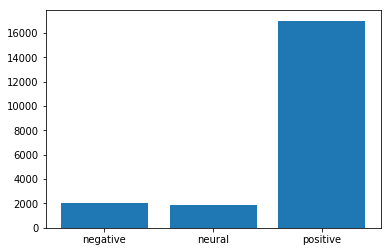

tổng số review: 20936


In [9]:
def plotData(inputJson):
    # load dữ liệu Json
    fJson = open(inputJson, 'r')
    dataJson = json.loads(fJson.read())
    fJson.close()
    start = {
        'negative':0,
        'neural':0,
        'positive':0
    }
    sum_reviews = 0
    #chép dũ liệu
    for pd in dataJson:
        sum_reviews += pd['reviews count']
        for rv in pd['reviews']:
            if rv['review_rating'] == 1 or rv['review_rating'] == 0 :
                start['negative'] += 1
            elif rv['review_rating'] == 2 or rv['review_rating'] == 3:
                start['neural'] += 1
            else:
                start['positive'] += 1
    #tiến hành vẽ
    plt.bar(start.keys(), start.values(), align='center')
    plt.show()
    print("tổng số review: " + str(sum_reviews))

plotData('DulieuDaQuaTienXuLi.json')

### Đọc các file dữ liệu và tóm tắt dữ liệu

In [11]:
def readData(pos, neur, neg, num):
    # đọc file
    pos_df = pd.read_csv(pos, names=['text'],encoding="utf-8");
    neur_df = pd.read_csv(neur, names=['text'],encoding="utf-8");
    neg_df = pd.read_csv(neg, names=['text'],encoding="utf-8");
    # gắn nhãn
    pos_df['label'] = 1;
    neur_df['label'] = 0;
    neg_df['label'] = -1;
    
    a = pos_df[:num]
    b = neur_df[:num]
    c = neg_df[:num]
    total = a.append(b)
    total = total.append(c)
    
    # tóm tắt dữ liệu
    return total

# 3) Xây dựng model

### Model 1: SVM



In [12]:
pipeline_svm = Pipeline([
('bow', CountVectorizer()),
('tfidf', TfidfTransformer()),
('classifier', SVC())
])

giải thích: 
kernel:

> linear: K(X,Y)=XTY

> poly: K(X,Y)=(γ⋅XTY+r)d,γ>0

> RBF: default: K(X,Y)=exp(∥X−Y∥2/2σ2

> Sigmoid: K(X,Y)=tanh(γ⋅XTY+r)

In [13]:
def get_SVM_model(pipeline):
    param_svm = [{'classifier__kernel': ['linear'], 'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}]
    return GridSearchCV(
        pipeline, #fit dữ liệu
        param_grid=param_svm, 
        refit=True, 
        n_jobs=-1,  # chạy trên CPUs
        scoring='accuracy',
        cv=StratifiedKFold(label_train, n_folds=5)
    )


### model 2: MLP

In [14]:
def get_MLP_model(n_node):
    return MLPClassifier(hidden_layer_sizes=(n_node), activation="tanh",
                                solver="lbfgs", max_iter=1000, random_state=0)
    

# Biến đổi thành dữ liệu số

In [15]:
def transformData(data_string):
    return CountVectorizer().fit_transform(data_string)

In [16]:
def transformData2(data_string):
    return TfidfVectorizer().fit_transform(data_string)

# 4) Huấn luyện model


### 4.1) Huấn luyện model

In [17]:
def train_model(model1, text_train, label_train):
    model1.fit(text_train, label_train)

# 5) Đánh giá model

### 5.1) model 1

> ##### Độ lỗi trong tập huấn luyện

In [ ]:
'''
np.mean(label_train != grid_svm.predict(text_train))
'''

> ##### Độ lỗi ngoài tập huấn luyện

In [ ]:
'''
np.mean(label_test != grid_svm.predict(text_test))
'''

### predict and result

In [ ]:
'''
print(classifier.predict(["great product wife happy fit really good recommend everyone thank"])[0])
print(classifier.predict(["I love this product"])[0])
print(classifier.predict(["everything say reason give 45 look high quality harden rubber rugged seem still price enough protection keep stylish"])[0])
print(classifier.predict(["honestly think great band like wide secure well use couple months though irritate skin like crazy think maybe user error try everything something material cause otherwise would give star stop usenow irritation get much"])[0])
print(classifier.predict(["use two month one band would stay lock"]))
'''

# Full code

In [18]:
if __name__ == '__main__':
    '''
    ### crawl Data
    ReadAsin('DuLieuTho.json')
    
    ### xử lí dữ liệu
    # chia dữ liệu khi còn là dữ liệu thô
    # chia dựa vào số sao
    devideData('DuLieuTho.json', 'pos_reviews.txt', 'neg_reviews.txt', 'neutr_reviews.txt')
    # tiếp tục chia dữ liệu thành tập test và tập train
    devideTestTrain('neg_reviews.txt', 'neg_train.txt', 'neg_test.txt')
    devideTestTrain('neutr_reviews.txt', 'neutr_train.txt', 'neutr_test.txt')
    devideTestTrain('pos_reviews.txt', 'pos_train.txt', 'pos_test.txt')
    '''
    '''
    # tiến hành tiền xử lí cho dữ liệu train (gồm cả xử lí tay)
    preProcData('pos_train.txt', 'pos_train_preproc.txt')
    preProcData('neutr_train.txt', 'neutr_train_preproc.txt')
    preProcData('neg_train.txt', 'neg_train_preproc.txt')
    
    # tiến hành tiền xử lí cho dữ liệu test (không xử lí tay, đảm bảo sự chính xác của model)
    preProcData('pos_test.txt', 'pos_test_preproc.txt')
    preProcData('neutr_test.txt', 'neutr_test_preproc.txt')
    preProcData('neg_test.txt', 'neg_test_preproc.txt')
    '''
    
    ### load dữ liệu train đã qua xử lí
    total_data_train = readData('pos_train_preproc.txt', 'neutr_train_preproc.txt', 'neg_train_preproc.txt', 1200).reset_index()
    ### load dữ liệu test đã qua xử lí
    total_data_test = readData('pos_test_preproc.txt', 'neutr_test_preproc.txt', 'neg_test_preproc.txt', 500).reset_index()

    # Load dữ liệu train và test đã phân chia và xử lí ở trên
    #text_train, text_test, label_train, label_test = train_test_split(total_data['text'], total_data['label'], test_size = 0.2)
    text_train = total_data_train['text']
    label_train = total_data_train['label']
    text_test = total_data_test['text']
    label_test = total_data_test['label']

    # chuyển dổi dữ liệu
    tfidf_trans = TfidfVectorizer()
    tfidf_text_train = tfidf_trans.fit_transform(text_train)
    tfidf_text_test = tfidf_trans.transform(text_test)
    print(tfidf_text_train.shape)
    print(tfidf_text_test.shape)
    
    pipeline_svm = Pipeline([
    #('bow', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('classifier', SVC())
    ])
    # Gọi model với pipeline 1
    grid_svm = get_SVM_model(pipeline_svm)

    # huấn luyện model 1
    train_model(grid_svm, tfidf_text_train, label_train)

    # gọi model
    # model MLP với 2 lớp ẩn và làn lượt có 5 và 5 nơ ron ẩn
    
    mlp = get_MLP_model([5, 5])
    # huấn luyện
    train_model(mlp, tfidf_text_train,label_train)
    
    

(3600, 3331)
(1498, 3331)


In [19]:
# đánh giá model
# đánh giá độ lỗi trên tập huấn luyện
print("Model 1: SVM")
print("\tDo loi tren tap huan luyen: " + str(100*np.mean(label_train != grid_svm.predict(tfidf_text_train))))
#print(100*np.mean(label_train != grid_svm.predict(tfidf_text_train)))

# Đánh giá độ lỗi ngoài tập huấn luyện
print("\tDo loi ngoai tap huan luyen: " + str(100*np.mean(label_test != grid_svm.predict(tfidf_text_test))))
#print(100*np.mean(label_test != grid_svm.predict(tfidf_text_test)))

# đánh giá độ lỗi trên tập huấn luyện
print("Model 2: MLP")
print("\tDo loi tren tap huan luyen: " + str(100*np.mean(label_train != mlp.predict(tfidf_text_train))))
#print(100*np.mean(label_train != mlp.predict(tfidf_text_train)))

# Đánh giá độ lỗi ngoài tập huấn luyện
print("\tDo loi ngoai tap huan luyen: " + str(100*np.mean(label_test != mlp.predict(tfidf_text_test))))
#print(100*np.mean(label_test != mlp.predict(tfidf_text_test)))
    

Model 1: SVM
	Do loi tren tap huan luyen: 11.13888888888889
	Do loi ngoai tap huan luyen: 27.169559412550065
Model 2: MLP
	Do loi tren tap huan luyen: 0.5277777777777778
	Do loi ngoai tap huan luyen: 35.24699599465955


### Thực hiện cross validation với 5-fold với kernel là SVC(kernel='linear', C=1)

In [20]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5)
k_accuracy = []
for train_index, test_index in kf.split(tfidf_text_train, label_train):
    
    model = SVC(kernel='linear', C=1)
    model.fit(tfidf_text_train[train_index], label_train[train_index])

    score = model.score(tfidf_text_train[test_index], label_train[test_index])
    k_accuracy.append(score)

In [21]:
print("**Kết quả**")
print("Độ chính xác của mỗi fold:")
print(k_accuracy)
print("\nĐộ chính xác trung bình:")
print(np.mean(k_accuracy))

**Kết quả**
Độ chính xác của mỗi fold:
[0.6236111111111111, 0.6944444444444444, 0.7388888888888889, 0.7472222222222222, 0.7111111111111111]

Độ chính xác trung bình:
0.7030555555555555


In [ ]:
# xem thông số

print(grid_svm.best_params_)


In [23]:
tfidf_text_test = tfidf_trans.transform(["too bab"])
print(grid_svm.predict(tfidf_text_test))
#print(grid_svm.predict(["honestly think great band like wide secure well use couple months though irritate skin like crazy think maybe user error try everything something material cause otherwise would give star stop usenow irritation get much"]))
#print(grid_svm.predict(["I love this product"]))

[-1]


Kết quả với kernel là linear:
<img src=".\resultPicture\linear.png" width = "200" height = "200">

Kết quả với kernel là sigmoid:
<img src=".\resultPicture\sigmoid.png" width = "200" height = "200">

Kết quả với kernel là rbf:
<img src=".\resultPicture\rbf.png" width = "200" height = "200">

In [ ]:
#preProcData('HomnayTest.txt', 'HomnayTestPreproc.txt')

### 5 Trường hợp dự đoán sai

In [51]:
TH_1 = ["I do not like this product!"]
tfidf_text_test = tfidf_trans.transform(TH_1)
print(grid_svm.predict(tfidf_text_test))
'''
ở trương hợp 1 này sai là vì dont được giữ lại, nhưng do not thì bị bỏ not
dẫn đến câu bị đánh vào neutral[0] thay vì negative[-1]
'''


TH_2 = ["I like apple watches but i dont like this band!"]
tfidf_text_test = tfidf_trans.transform(TH_2)
print(grid_svm.predict(tfidf_text_test))
'''
Mục tiêu [-1]
Dự đoán [0]

vì ở đây không phân tích câu theo entity mà chỉ phân tích toàn bộ review, nên khi sự xuất hiện của cả  
dont và like trong câu làm cho câu bị nhận dạng sang neutral[0]
'''

TH_3 = ["I dont know why but i like this!"]
tfidf_text_test = tfidf_trans.transform(TH_3)
print(grid_svm.predict(tfidf_text_test))

TH_4 = ["it like another band, nothing special"]
tfidf_text_test = tfidf_trans.transform(TH_4)
print(grid_svm.predict(tfidf_text_test))
'''
Mục tiêu [0]
Dự đoán [1]
Trong trường hợp này, nghĩa từ like không còn là thích nữa. Dẫn đến dự đoán sai.
'''

TH_5 = ["tell me if you like!"]
tfidf_text_test = tfidf_trans.transform(TH_5)
print(grid_svm.predict(tfidf_text_test))
'''
Muc tiêu [0]
Dự đoán [-1]

Sư xuất hiện của từ call hay tell, không rõ nguyên nhân!
Có lẽ là vì trong tập dữ liệu negative xuất hiện nhiều từ call hoặc tell, dẫn đến từ này bị đánh trọng số 
cao cho phần negative
'''

[0]
[0]
[0]
[1]
[-1]


'\nMuc tiêu [0]\nDự đoán [-1]\n\nSư xuất hiện của từ call hay tell, không rõ nguyên nhân!\nCó lẽ là vì trong tập dữ liệu negative xuất hiện nhiều từ call hoặc tell, dẫn đến từ này bị đánh trọng số \ncao cho phần negative\n'